In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_csv('covid_19_data.csv' ,parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)



In [17]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [18]:
df.dtypes

SNo                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [19]:
#Handling Missing Values
df.isnull().sum().to_frame('nulls')

,nulls
SNo,0
Date,0
Province/State,2925
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


# Total Confirmed Cases, Deaths and Recovered Cases in the world 19/03/2020

In [20]:
dtfr = df.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
sorted_By_Confirmed=dtfr.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')

world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()

world_Deaths_rate=(world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total

China=sorted_By_Confirmed[sorted_By_Confirmed['Country']=='Mainland China']
China_Recovered_rate=(int(China['Recovered'].values)*100)/int(China['Confirmed'].values)


veri={'Total Confirmed cases  in the world':world_Confirmed_Total,'Total Deaths cases in the world':world_Deaths_Total,'Total Recovered cases in the world':world_Recovered_Total,'rate of Recovered Cases %':world_Recovered_rate,'rate of death Cases %':world_Deaths_rate,'rate of Recovered China cases %':China_Recovered_rate}
veri=pd.DataFrame.from_dict(veri, orient='index' ,columns=['Total'])

veri.style.background_gradient(cmap='Purples')

,Total
rate of death Cases %,4.06326
rate of Recovered China cases %,87
Total Deaths cases in the world,9866
Total Recovered cases in the world,84963
rate of Recovered Cases %,34.9916
Total Confirmed cases in the world,242810


# Graphic illustration of Total cases in the world¶


Text(0.5,1,'Total Cases / Deaths / Recovered')

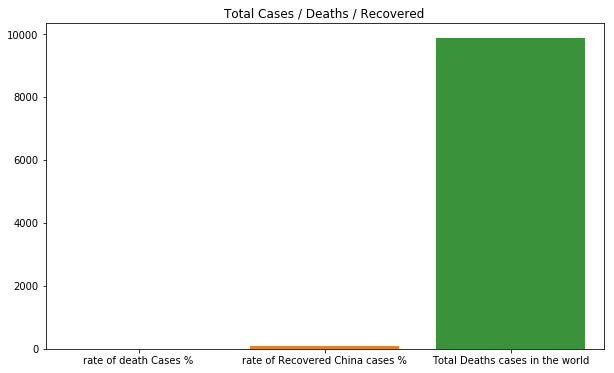

In [21]:
veri=veri.head(3)
x=veri.index
y=veri['Total'].values
plt.rcParams['figure.figsize'] = (10, 6)
sns.barplot(x,y,order=x ).set_title('Total Cases / Deaths / Recovered')  

# Covid19 Virus With Numbers
### Confirmed -- Cumulative number of confirmed cases till that date
### Deaths -- Cumulative number of of deaths till that date
### Recovered : Cumulative number of recovered cases till that date
### Recovered Cases Rate % -- rate of Recovered Cases from total of Confirmed cases in same Country
### Deaths Cases Rate % -- rate of death Cases from total of Confirmed cases in same Country
### Total Cases Rate % -- rate of total cases from Total cases in the world

In [23]:
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total

sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)

print("Sorted By Confirmed Cases")
sorted_By_Confirmed.head(60).style.background_gradient(cmap='Blues')

Sorted By Confirmed Cases


,Date,Country,Confirmed,Deaths,Recovered,Recovered Cases Rate %,Deaths Cases Rate %,Total Cases Rate %
3323,03/19/2020,Mainland China,80931,3245,70430,87.0247,4.00959,33.331
3305,03/19/2020,Italy,41035,3405,4440,10.82,8.29779,16.9
3301,03/19/2020,Iran,18407,1284,5710,31.0208,6.97561,7.58082
3374,03/19/2020,Spain,17963,830,1107,6.16267,4.62061,7.39797
3284,03/19/2020,Germany,15320,44,113,0.737598,0.287206,6.30946
3390,03/19/2020,US,13680,200,108,0.789474,1.46199,5.63403
3279,03/19/2020,France,10886,243,12,0.110233,2.23222,4.48334
3373,03/19/2020,South Korea,8565,91,1540,17.9802,1.06246,3.52745
3379,03/19/2020,Switzerland,4075,41,15,0.368098,1.00613,1.67827
3389,03/19/2020,UK,2716,138,67,2.46686,5.081,1.11857


# Difference 18/03 and 19/03¶


In [24]:
dtfr_Difference = df.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed']].sum().reset_index()
sorted_By_Confirmed_Difference=dtfr_Difference.sort_values('Country',ascending=False)

x1=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/19/2020'].reset_index().drop('index',axis=1)
x2=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/18/2020'].reset_index().drop('index',axis=1)

h=pd.merge(x2,x1,on='Country')
h['cases_difference_18_19']=h['Confirmed_y']-h['Confirmed_x']
h.sort_values('cases_difference_18_19',ascending=False).head(60).style.background_gradient(cmap='Greens')

,Date_x,Country,Confirmed_x,Date_y,Confirmed_y,cases_difference_18_19
7,03/18/2020,US,7786,03/19/2020,13680,5894
91,03/18/2020,Italy,35713,03/19/2020,41035,5322
23,03/18/2020,Spain,13910,03/19/2020,17963,4053
112,03/18/2020,Germany,12327,03/19/2020,15320,2993
117,03/18/2020,France,9052,03/19/2020,10886,1834
18,03/18/2020,Switzerland,3028,03/19/2020,4075,1047
95,03/18/2020,Iran,17361,03/19/2020,18407,1046
57,03/18/2020,Netherlands,2056,03/19/2020,2465,409
155,03/18/2020,Austria,1646,03/19/2020,2013,367
44,03/18/2020,Portugal,448,03/19/2020,785,337


# Top 10 Infected Countries¶


Text(0.5,1,'Total Cases / Deaths / Recovered')

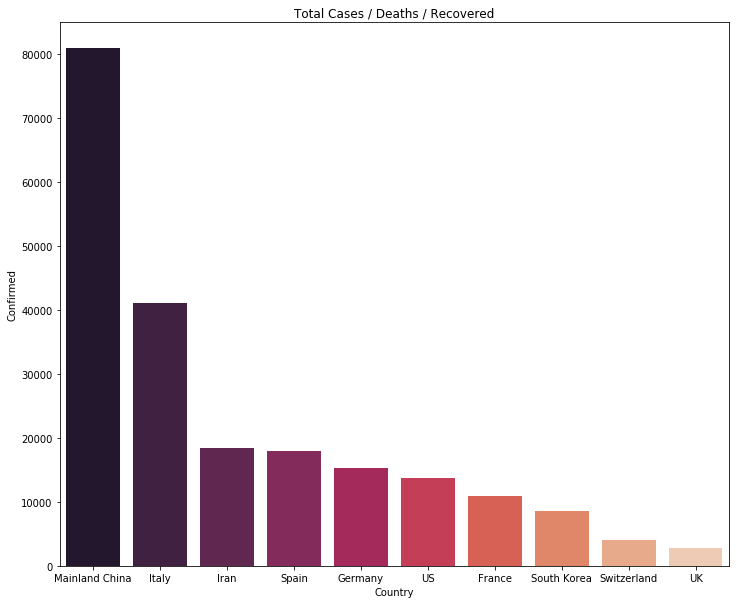

In [25]:
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.Country
y=sorted_By_Confirmed1.Confirmed
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Total Cases / Deaths / Recovered')

# Cases rate per country of total cases in the world

Cases Rate per country of Total Cases in the world 


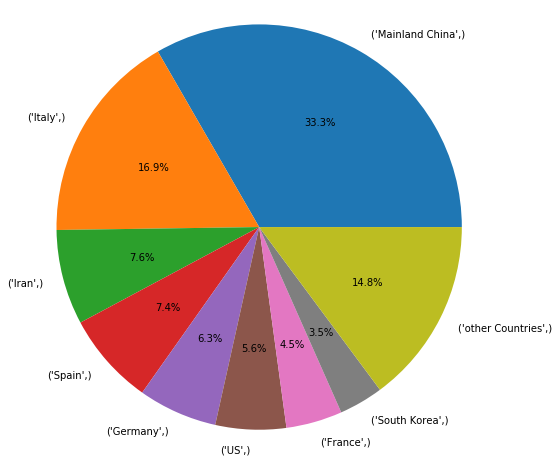

In [29]:
Top7=sorted_By_Confirmed.iloc[0:8,-1].values
others=sorted_By_Confirmed.iloc[8:,-1].sum()
x=np.array(Top7)
x2=np.array(others)
rates=np.concatenate((x, x2), axis=None)

rate_perCountry=pd.DataFrame(data=rates,index=[sorted_By_Confirmed['Country'].head(9)] ,columns=['rate'])
rate_perCountry.rename(index={'Switzerland': "other Countries"},inplace=True)


labels=rate_perCountry.index
sizes=rate_perCountry['rate'].values

explode = None  # explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
print("Cases Rate per country of Total Cases in the world ")
plt.show()


# Increasing cases per day ¶


In [34]:
cases_per_Day = df.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('Date',ascending=False)

sorted_By_Confirmed1.style.background_gradient(cmap='Oranges')




,Date,Confirmed,Deaths,Recovered
57,03/19/2020,242713,9867,84962
56,03/18/2020,214915,8733,83313
55,03/17/2020,197168,7905,80840
54,03/16/2020,181546,7126,78088
53,03/15/2020,167447,6440,76034
52,03/14/2020,156099,5819,72624
51,03/13/2020,145193,5404,70251
50,03/12/2020,128343,4720,68324
49,03/11/2020,125865,4615,67003
48,03/10/2020,118582,4262,64404


Blue : Confirmed Cases 
Red : Deaths Cases 
Green : Recovered Cases 


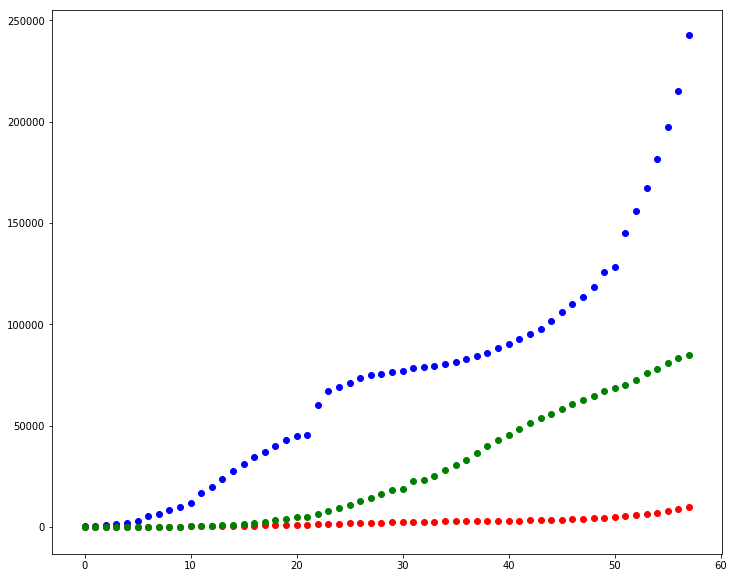

In [35]:
#plot
x=cases_per_Day.index

y=cases_per_Day.Confirmed
y1=cases_per_Day.Deaths
y2=cases_per_Day.Recovered

plt.scatter(x,y,color='blue' , label='Confirmed Cases')
plt.scatter(x,y1,color='red' ,label="Deaths Cases")
plt.scatter(x,y2,color='green',label="Recovered Cases")
print("Blue : Confirmed Cases ")
print("Red : Deaths Cases ")
print("Green : Recovered Cases ")
plt.show()